# Preliminaries

This commands are used in Google Colab:

!pip install deap

from google.colab import drive
drive.mount("/content/gdrive")

Importing python packages and setting display parameters

In [1]:
import math as mt
import random as rnd
import numpy as np
import itertools as it

import numba
from numba import jit
import joblib

import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.ticker import EngFormatter
from matplotlib import lines

import pandas as pd
from collections import OrderedDict
import statistics as stats
import scipy.stats as sstats
import probscale

In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = "retina"

plt.style.use("default")
plt.style.use("bmh")
# plt.rcParams.update({"figure.autolayout": True})
plt.rcParams["figure.figsize"] = (12, 9)
mpl.rcParams["figure.dpi"] = 100
mpl.rcParams["savefig.dpi"] = 100

In [3]:
pd.set_option("display.latex.repr", True)

In [4]:
pd.set_option("display.latex.longtable", True)

This sets the work directory for the pickle files

In [5]:
pickle_dir = "./pickle/"
file_sufix = "C_04"
pickle_dir + file_sufix

'./pickle/C_04'

Run this when working in Google Colab:

pickle_dir = "/content/gdrive/My Drive/Colab Notebooks/thesis/"
pickle_dir + file_sufix

# Reading data

## Fitness results data

Reading the Data Frame from a pickle file

In [6]:
fit_fin_df_file = pickle_dir + file_sufix + "_fit_fin_df_80k.xz"
fit_res_df = pd.read_pickle(fit_fin_df_file)

Replicates in the sample

In [7]:
print("Replicates in sample: " + str(len(fit_res_df)))
print("Experiments in sample: " + str(len(fit_res_df) / 40))

Replicates in sample: 5120
Experiments in sample: 128.0


In [8]:
fit_res_df.head()

,exp,pop,b_ratio,cx_pb,mut_pb,mut_sig,k_par,k_sur,rep,seed,births,avg,best,med,std,worst
0,1,20,2,0.1,0.1,0.5,2,2,1,1824,80020,5.113027e+00,5.113027e+00,5.113027e+00,0.000000,5.113027e+00
1,1,20,2,0.1,0.1,0.5,2,2,2,2793,80020,4.273457e+01,4.273457e+01,4.273457e+01,0.000000,4.273457e+01
2,1,20,2,0.1,0.1,0.5,2,2,3,9988,80020,4.699362e-07,4.699362e-07,4.699362e-07,0.000000,4.699362e-07
3,1,20,2,0.1,0.1,0.5,2,2,4,4088,80020,1.620033e-06,1.620033e-06,1.620033e-06,0.000000,1.620033e-06
4,1,20,2,0.1,0.1,0.5,2,2,5,6200,80020,1.687496e-01,8.365868e-07,8.365868e-07,0.754667,3.374976e+00


In [9]:
fit_res_df.tail()

,exp,pop,b_ratio,cx_pb,mut_pb,mut_sig,k_par,k_sur,rep,seed,births,avg,best,med,std,worst
5115,128,160,4,0.5,0.5,5.0,6,6,36,3907,80160,0.137353,9.136821e-07,9.136821e-07,1.326063,16.358934
5116,128,160,4,0.5,0.5,5.0,6,6,37,3550,80160,0.210728,4.132278e-06,4.132278e-06,1.471520,13.500468
5117,128,160,4,0.5,0.5,5.0,6,6,38,11,80160,0.436518,1.025674e-05,1.025674e-05,2.431827,19.754261
5118,128,160,4,0.5,0.5,5.0,6,6,39,5147,80160,0.845689,1.086725e-05,1.086725e-05,5.531744,54.523859
5119,128,160,4,0.5,0.5,5.0,6,6,40,5868,80160,1.018748,6.363164e-06,6.363164e-06,5.396264,45.795916


In [10]:
fit_res_df["best"].min()

-2.0082069340787712e-10

In [11]:
t_u_v = fit_res_df.copy()
t_u_v = t_u_v[['exp', 'pop', 'b_ratio', 'cx_pb', 'mut_pb', 'mut_sig', 'k_par', 'k_sur','best']]
t_u_v = t_u_v.assign(Successful= lambda x:x["best"]<1e-6)
t_u_v = t_u_v.groupby(["exp", 'pop', 'b_ratio', 'cx_pb', 'mut_pb', 'mut_sig', 'k_par', 'k_sur'])
t_u_v = t_u_v["Successful"].sum().reset_index()
t_u_v["Successful"] = t_u_v["Successful"]/40*100
print(t_u_v.to_latex(index=False))

\begin{longtable}{rrrrrrrrr}
\toprule
 exp &  pop &  b\_ratio &  cx\_pb &  mut\_pb &  mut\_sig &  k\_par &  k\_sur &  Successful \\
\midrule
\endhead
\midrule
\multicolumn{9}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
   1 &   20 &        2 &    0.1 &     0.1 &      0.5 &      2 &      2 &        22.5 \\
   2 &   20 &        2 &    0.1 &     0.1 &      0.5 &      2 &      6 &        37.5 \\
   3 &   20 &        2 &    0.1 &     0.1 &      0.5 &      6 &      2 &        12.5 \\
   4 &   20 &        2 &    0.1 &     0.1 &      0.5 &      6 &      6 &        35.0 \\
   5 &   20 &        2 &    0.1 &     0.1 &      5.0 &      2 &      2 &         0.0 \\
   6 &   20 &        2 &    0.1 &     0.1 &      5.0 &      2 &      6 &         0.0 \\
   7 &   20 &        2 &    0.1 &     0.1 &      5.0 &      6 &      2 &         0.0 \\
   8 &   20 &        2 &    0.1 &     0.1 &      5.0 &      6 &      6 &         0.0 \\
   9 &   20 &        2 &    0.1 &     0.5 &  

In [12]:
bins = [-1e-8, 1e-6, 1, 5, 6, 7, float("inf")]

In [13]:
d_e_f = fit_res_df.copy()
d_e_f = d_e_f[['exp', 'best']]
d_e_f["bins"] = pd.cut(d_e_f["best"], bins)
d_e_f = d_e_f.groupby(['exp','bins']).size().unstack(level=-1, fill_value=0)
print(d_e_f.to_latex())

\begin{longtable}{lrrrrrr}
\toprule
bins &  (-1e-08, 1e-06] &  (1e-06, 1.0] &  (1.0, 5.0] &  (5.0, 6.0] &  (6.0, 7.0] &  (7.0, inf] \\
exp &                  &               &             &             &             &             \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1   &                9 &             5 &           0 &          13 &           6 &           7 \\
2   &               15 &             1 &           0 &           9 &          10 &           5 \\
3   &                5 &             6 &           0 &          12 &           8 &           9 \\
4   &               14 &             1 &           0 &           8 &           8 &           9 \\
5   &                0 &            14 &           0 &           9 &          17 &           0 \\
6   &                0 &            19 &           0 &          10 &          11 &           0 \\
7   &                0 &            16 &           0 &      

In [14]:
d_e_f["bins"] = pd.cut(d_e_f["best"], bins)
d_e_f = d_e_f.merge(x_y_z[["exp", 'pop', 'b_ratio', 'cx_pb', 'mut_pb', 'mut_sig', 'k_par', 'k_sur', 'Par Conf']], 
                    on=["exp", 'pop', 'b_ratio', 'cx_pb', 'mut_pb', 'mut_sig', 'k_par', 'k_sur'])
d_e_f = d_e_f[["exp", "Par Conf", "rep", "births", "bins"]]
d_e_f = d_e_f.groupby(['exp','Par Conf', "births", 'bins']).size().unstack(level=-1, fill_value=0)
d_e_f

TypeError: Cannot cast array data from dtype('float64') to dtype('<U32') according to the rule 'safe'

# Experiment's factors and levels and other parameters

## Common parameters

In [15]:
# Algorithm parameters
# Number of replicates, and generations per experiment
rep_end = 40
births_end = 80e3

# Genes
gen_size = 2
# Population size
pop_size_lvl = [20, 160]
# Progeny and parents size ratio to population size
b_ratio_lvl = [2, 4]

# Progeny parameters
## Crossover probability per gene
cx_pb_lvl = [0.1, 0.5]
## Mutation probability per gene
mut_pb_lvl = [0.1, 0.5]
## Mutation strength
mut_sig_lvl = [0.5, 5]

# Selection by tournament
# Tournament size parent selection
k_par_lvl = [2, 6]
# Tournament size survivor selection
k_sur_lvl = [2, 6]

## Factor levels

In [16]:
factors_levels = [
    ("pop", "Population size", "Integer +", min(pop_size_lvl), max(pop_size_lvl)),
    ("b_ratio", "Progeny-to-pop ratio", "Real +", min(b_ratio_lvl), max(b_ratio_lvl)),
    ("cx_pb", "Crossover prob", "Real [0,1]", min(cx_pb_lvl), max(cx_pb_lvl)),
    ("mut_pb", "Mutation prob", "Real [0,1]", min(mut_pb_lvl), max(mut_pb_lvl)),
    ("mut_sig", "Mutation sigma", "Real +", min(mut_sig_lvl), max(mut_sig_lvl)),
    ("k_par", "Parent tourn size", "Integer +", min(k_par_lvl), max(k_par_lvl)),
    ("k_sur", "Surviv tourn size", "Integer +", min(k_sur_lvl), max(k_sur_lvl)),
]

factors_df = pd.DataFrame(
    factors_levels, columns=["Factor", "Label", "Range", "LowLevel", "HighLevel"]
)
factors_df = factors_df.set_index(["Factor"])

factors_df

,Label,Range,LowLevel,HighLevel
Factor,,,,
pop,Population size,Integer +,20.0,160.0
b_ratio,Progeny-to-pop ratio,Real +,2.0,4.0
cx_pb,Crossover prob,"Real [0,1]",0.1,0.5
mut_pb,Mutation prob,"Real [0,1]",0.1,0.5
mut_sig,Mutation sigma,Real +,0.5,5.0
k_par,Parent tourn size,Integer +,2.0,6.0
k_sur,Surviv tourn size,Integer +,2.0,6.0


In [17]:
print(factors_df.to_latex())

\begin{longtable}{lllrr}
\toprule
{} &                 Label &       Range &  LowLevel &  HighLevel \\
Factor  &                       &             &           &            \\
\midrule
\endhead
\midrule
\multicolumn{5}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
pop     &       Population size &   Integer + &      20.0 &      160.0 \\
b\_ratio &  Progeny-to-pop ratio &      Real + &       2.0 &        4.0 \\
cx\_pb   &        Crossover prob &  Real [0,1] &       0.1 &        0.5 \\
mut\_pb  &         Mutation prob &  Real [0,1] &       0.1 &        0.5 \\
mut\_sig &        Mutation sigma &      Real + &       0.5 &        5.0 \\
k\_par   &     Parent tourn size &   Integer + &       2.0 &        6.0 \\
k\_sur   &     Surviv tourn size &   Integer + &       2.0 &        6.0 \\
\end{longtable}



# DOE Analisis of Data

List with the Factors names

In [18]:
factors = list(factors_df.index.array)
print(factors)
factors_DOE = [factor + "_DOE" for factor in factors]
print(factors_DOE)

['pop', 'b_ratio', 'cx_pb', 'mut_pb', 'mut_sig', 'k_par', 'k_sur']
['pop_DOE', 'b_ratio_DOE', 'cx_pb_DOE', 'mut_pb_DOE', 'mut_sig_DOE', 'k_par_DOE', 'k_sur_DOE']


In [19]:
fit_success = fit_res_df.assign(success=fit_res_df.best.le(1e-6))
fit_success = fit_success.groupby(factors, as_index=False).agg({"success": np.sum})

In [20]:
fit_success["success"] = fit_success["success"]/40*100
fit_success

,pop,b_ratio,cx_pb,mut_pb,mut_sig,k_par,k_sur,success
0,20,2,0.1,0.1,0.5,2,2,22.5
1,20,2,0.1,0.1,0.5,2,6,37.5
2,20,2,0.1,0.1,0.5,6,2,12.5
3,20,2,0.1,0.1,0.5,6,6,35.0
4,20,2,0.1,0.1,5.0,2,2,0.0
5,20,2,0.1,0.1,5.0,2,6,0.0
6,20,2,0.1,0.1,5.0,6,2,0.0
7,20,2,0.1,0.1,5.0,6,6,0.0
8,20,2,0.1,0.5,0.5,2,2,0.0
9,20,2,0.1,0.5,0.5,2,6,35.0


In [21]:
fit_success_doe = fit_res_df.assign(success=fit_res_df.best.le(1e-6))
fit_success_doe = fit_success_doe.groupby(factors, as_index=False).agg(
    {"success": np.sum}
)

In [22]:
for factor in factors:
    fac_min = fit_success[factor].min()
    fac_max = fit_success[factor].max()

    fit_success[factor] = fit_success[factor].map(lambda v: -1 if v == fac_min else 1)

## Defining variables and variable labels

In [23]:
labels = {}
labels[1] = list(factors)
for i in [2, 3, 4, 5, 6, 7]:
    labels[i] = list(it.combinations(labels[1], i))

obs_list = ["success"]

In [24]:
#for k in labels.keys():
#    print(str(k) + " : " + str(labels[k]))
#print()
#print(obs_list)

## Computing Main and Interaction Effects

### Constant Effect

In [25]:
effects = {}

# Start with the constant effect: this is $\overline{y}$
effects[0] = {"x0": [fit_success[obs_list[0]].mean()]}
print(effects[0])

{'x0': [24.3359375]}


### Main effect of each variable

In [26]:
effects[1] = {}
for key in labels[1]:
    effects_result = []
    for obs in obs_list:
        effects_df = fit_success.groupby(key)[obs].mean()
        result = sum([zz * effects_df.loc[zz] for zz in effects_df.index])
        effects_result.append(result)
    effects[1][key] = effects_result

effects[1]

{'pop': [18.28125],
 'b_ratio': [-3.75],
 'cx_pb': [0.3125],
 'mut_pb': [10.859375],
 'mut_sig': [-40.15625],
 'k_par': [5.0],
 'k_sur': [17.34375]}

### Interaction effects (2-variable to 7-variable interactions)

In [27]:
for c in range(2, 8):
    effects[c] = {}
    for key in labels[c]:
        effects_result = []
        for obs in obs_list:
            effects_df = fit_success.groupby(key)[obs].mean()
            result = sum(
                [
                    np.prod(zz) * effects_df.loc[zz] / (2 ** (len(zz) - 1))
                    for zz in effects_df.index
                ]
            )
            effects_result.append(result)
        effects[c][key] = effects_result

C:\Anaconda3\envs\ea_thesis\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.
  


In [28]:
len(effects[1])+ len(effects[2]) + len(effects[3]) + len(effects[4]) + len(effects[5]) + len(effects[6]) + len(effects[7])

127

In [29]:
def printd(d):
    for k in d.keys():
        print("%25s : %s" % (k, d[k]))

#for i in range(1, 8):
#    printd(effects[i])

## Analysis

### Analyzing Effects

In [30]:
master_dict = {}
for nvars in effects.keys():
    effect = effects[nvars]
    for k in effect.keys():
        v = effect[k]
        master_dict[k] = nvars, v[0]

master_df = pd.DataFrame(master_dict).T
master_df.columns = ["interaction"] + obs_list
#master_df.head(15)

We calculate the Percentage contribution of each main factor to the variance

In [31]:
n_doe = 1
k_doe = 7

y1 = master_df.copy()
y1 = y1.iloc[y1[obs_list[0]].abs().argsort].iloc[::-1]
y1 = y1.drop("x0")
y1.columns = ["Int Level", "Effect_Estimate"]
y1.index.names = ["Factors"]
y1["Sum_of_Squares"] = y1["Effect_Estimate"] ** 2 * n_doe * (2 ** (k_doe - 2))

Top Fifteen of Percentage contribution to the variance of Interactions

In [32]:
SS_tot = (fit_success[obs_list[0]] ** 2).sum() - (
    (fit_success[obs_list[0]].sum() ** 2) / len(fit_success[obs_list[0]])
)
SS_err = SS_tot - (y1["Sum_of_Squares"].sum())
y1["%_Contribution"] = y1["Sum_of_Squares"] / SS_tot * 100
effect_estimate = y1.copy()
effect_estimate.index.names = ["Interaction"]
effect_estimate.drop(["Int Level"], axis=1).head(15)

,Effect_Estimate,Sum_of_Squares,%_Contribution
Interaction,,,
mut_sig,-40.156250,51600.781250,49.762766
pop,18.281250,10694.531250,10.313593
k_sur,17.343750,9625.781250,9.282912
"(pop, mut_sig)",-17.109375,9367.382812,9.033718
"(mut_sig, k_sur)",-11.484375,4220.507812,4.070174
mut_pb,10.859375,3773.632812,3.639216
"(k_par, k_sur)",-6.171875,1218.945312,1.175527
"(mut_pb, k_sur)",5.625000,1012.500000,0.976435
"(mut_sig, k_par, k_sur)",5.625000,1012.500000,0.976435


In [33]:
print(effect_estimate.drop(["Int Level"], axis=1).head(20).to_latex(float_format=lambda x: '%.1f' % x))

\begin{longtable}{lrrr}
\toprule
{} &  Effect\_Estimate &  Sum\_of\_Squares &  \%\_Contribution \\
Interaction                     &                  &                 &                 \\
\midrule
\endhead
\midrule
\multicolumn{4}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
mut\_sig                         &            -40.2 &         51600.8 &            49.8 \\
pop                             &             18.3 &         10694.5 &            10.3 \\
k\_sur                           &             17.3 &          9625.8 &             9.3 \\
(pop, mut\_sig)                  &            -17.1 &          9367.4 &             9.0 \\
(mut\_sig, k\_sur)                &            -11.5 &          4220.5 &             4.1 \\
mut\_pb                          &             10.9 &          3773.6 &             3.6 \\
(k\_par, k\_sur)                  &             -6.2 &          1218.9 &             1.2 \\
(mut\_pb, k\_sur)                 &              5.6 &

Top Ten of Percentage contribution to the variance of main interactions

In [34]:
query = effect_estimate["Int Level"] == 1
effect_estimate[query].drop(["Int Level"], axis=1)

,Effect_Estimate,Sum_of_Squares,%_Contribution
Interaction,,,
mut_sig,-40.156250,51600.781250,49.762766
pop,18.281250,10694.531250,10.313593
k_sur,17.343750,9625.781250,9.282912
mut_pb,10.859375,3773.632812,3.639216
k_par,5.000000,800.000000,0.771504
b_ratio,-3.750000,450.000000,0.433971
cx_pb,0.312500,3.125000,0.003014


Top Ten of Percentage contribution to the variance of second-order interactions

In [35]:
query = effect_estimate["Int Level"] == 2
effect_estimate[query].drop(["Int Level"], axis=1).head(10)

,Effect_Estimate,Sum_of_Squares,%_Contribution
Interaction,,,
"(pop, mut_sig)",-17.109375,9367.382812,9.033718
"(mut_sig, k_sur)",-11.484375,4220.507812,4.070174
"(k_par, k_sur)",-6.171875,1218.945312,1.175527
"(mut_pb, k_sur)",5.625000,1012.500000,0.976435
"(mut_pb, k_par)",5.312500,903.125000,0.870956
"(mut_pb, mut_sig)",-4.375000,612.500000,0.590683
"(pop, mut_pb)",4.375000,612.500000,0.590683
"(pop, k_sur)",3.671875,431.445312,0.416077
"(mut_sig, k_par)",-3.515625,395.507812,0.381420


Top Ten of Percentage contribution to the variance of third-order interactions

In [36]:
query = effect_estimate["Int Level"] == 3
effect_estimate[query].drop(["Int Level"], axis=1).head(10)

,Effect_Estimate,Sum_of_Squares,%_Contribution
Interaction,,,
"(mut_sig, k_par, k_sur)",5.625000,1012.500000,0.976435
"(mut_pb, k_par, k_sur)",-4.453125,634.570312,0.611967
"(mut_pb, mut_sig, k_par)",-3.984375,508.007812,0.489913
"(pop, mut_pb, mut_sig)",-3.984375,508.007812,0.489913
"(pop, mut_sig, k_sur)",-2.656250,225.781250,0.217739
"(b_ratio, mut_sig, k_sur)",-2.656250,225.781250,0.217739
"(pop, b_ratio, cx_pb)",2.187500,153.125000,0.147671
"(pop, k_par, k_sur)",-2.187500,153.125000,0.147671
"(cx_pb, mut_pb, mut_sig)",-1.796875,103.320312,0.099640


Percentage contribution of each Interaction level to the variance

In [37]:
var = y1.groupby(["Int Level"]).agg(
    OrderedDict(
        [
            ("Effect_Estimate", "count"),
            ("Sum_of_Squares", "sum"),
            ("%_Contribution", ["sum", "max", "min"]),
        ]
    )
).rename(columns={"Effect_Estimate": "Count", "sum": "total", "count": "total"}).to_latex()
print(var)

\begin{longtable}{lrrrrr}
\toprule
{} & Count & Sum\_of\_Squares & \multicolumn{3}{l}{\%\_Contribution} \\
{} & total &          total &          total &        max &       min \\
Int Level &       &                &                &            &           \\
\midrule
\endhead
\midrule
\multicolumn{6}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
1.0       &     7 &   76947.851562 &      74.206976 &  49.762766 &  0.003014 \\
2.0       &    21 &   19587.304688 &      18.889607 &   9.033718 &  0.000000 \\
3.0       &    35 &    4227.929688 &       4.077331 &   0.976435 &  0.000000 \\
4.0       &    35 &    1946.679688 &       1.877339 &   0.433971 &  0.000188 \\
5.0       &    21 &     659.960938 &       0.636453 &   0.099640 &  0.000000 \\
6.0       &     7 &     253.320312 &       0.244297 &   0.091164 &  0.003014 \\
7.0       &     1 &      70.507812 &       0.067996 &   0.067996 &  0.067996 \\
\end{longtable}



### Main effects plot

Colors represent if factor is in the top 3 (green), top 5 (blue), top 10 (yellow)

In [38]:
effects_top_10 = effect_estimate.head(9).index.values.tolist()
effects_top_5 = effect_estimate.head(4).index.values.tolist()
effects_top_3 = effect_estimate.head(2).index.values.tolist()
query = effect_estimate["Int Level"] == 1
effect_level_1_ranked = effect_estimate[query].index.values.tolist()
query = effect_estimate["Int Level"] == 2
effect_level_2_ranked = effect_estimate[query].index.values.tolist()

print("Top 10 of effects with biggest impact:")
print(effects_top_10)
print("First level interactions sorted by impact:")
print(effect_level_1_ranked)
print("Secont level interactions sorted by impact:")
print(effect_level_2_ranked)

Top 10 of effects with biggest impact:
['mut_sig', 'pop', 'k_sur', ('pop', 'mut_sig'), ('mut_sig', 'k_sur'), 'mut_pb', ('k_par', 'k_sur'), ('mut_pb', 'k_sur'), ('mut_sig', 'k_par', 'k_sur')]
First level interactions sorted by impact:
['mut_sig', 'pop', 'k_sur', 'mut_pb', 'k_par', 'b_ratio', 'cx_pb']
Secont level interactions sorted by impact:
[('pop', 'mut_sig'), ('mut_sig', 'k_sur'), ('k_par', 'k_sur'), ('mut_pb', 'k_sur'), ('mut_pb', 'k_par'), ('mut_pb', 'mut_sig'), ('pop', 'mut_pb'), ('pop', 'k_sur'), ('mut_sig', 'k_par'), ('b_ratio', 'k_sur'), ('cx_pb', 'mut_pb'), ('b_ratio', 'mut_sig'), ('pop', 'b_ratio'), ('pop', 'k_par'), ('pop', 'cx_pb'), ('b_ratio', 'cx_pb'), ('cx_pb', 'mut_sig'), ('cx_pb', 'k_sur'), ('b_ratio', 'k_par'), ('cx_pb', 'k_par'), ('b_ratio', 'mut_pb')]


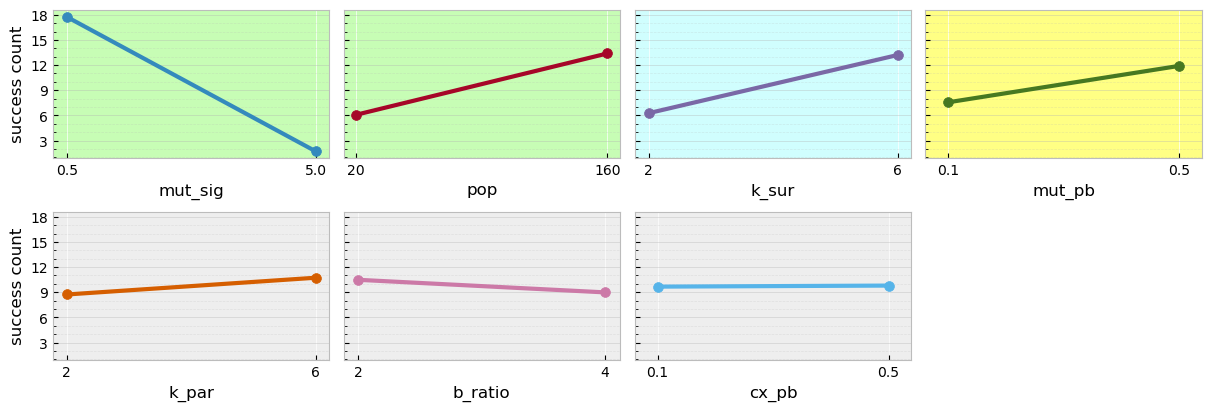

Wall time: 3.1 s


In [39]:
%%time
fig, axs = plt.subplots(
    nrows=2, ncols=4, sharey=True, constrained_layout=True, figsize=(12, 4)
)

for ax, i in zip(axs.flatten(), range(len(effect_level_1_ranked))):
    sns.regplot(
        x=effect_level_1_ranked[i],
        y="success",
        data=fit_success_doe,
        x_estimator=np.mean,
        x_ci=None,
        ci=None,
        truncate=True,
        ax=ax,
    )
    ax.set_ylabel(None)
    ax.set_axisbelow(True)
    x_majors = [
        fit_success_doe[effect_level_1_ranked[i]].min(),
        fit_success_doe[effect_level_1_ranked[i]].max(),
    ]
    ax.xaxis.set_major_locator(ticker.FixedLocator(x_majors))
    ax.grid(True, axis="x", which="major", alpha=1, color="w", ls="-")
    ax.yaxis.set_major_locator(ticker.MultipleLocator(3))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.grid(True, axis="y", which="major", alpha=0.5, ls="-")
    ax.grid(True, axis="y", which="minor", alpha=0.25, ls="--")

for ax, i in zip(axs.flatten(), range(len(effect_level_1_ranked))):
    if effect_level_1_ranked[i] in effects_top_10:
        ax.set_facecolor("xkcd:pale yellow")
    if effect_level_1_ranked[i] in effects_top_5:
        ax.set_facecolor("xkcd:pale blue")
    if effect_level_1_ranked[i] in effects_top_3:
        ax.set_facecolor("xkcd:pale green")

axs[0, 0].set_ylabel("success count")
axs[1, 0].set_ylabel("success count")

axs.flatten()[-1].axis("off")

plt.show()

### Interaction effects plot

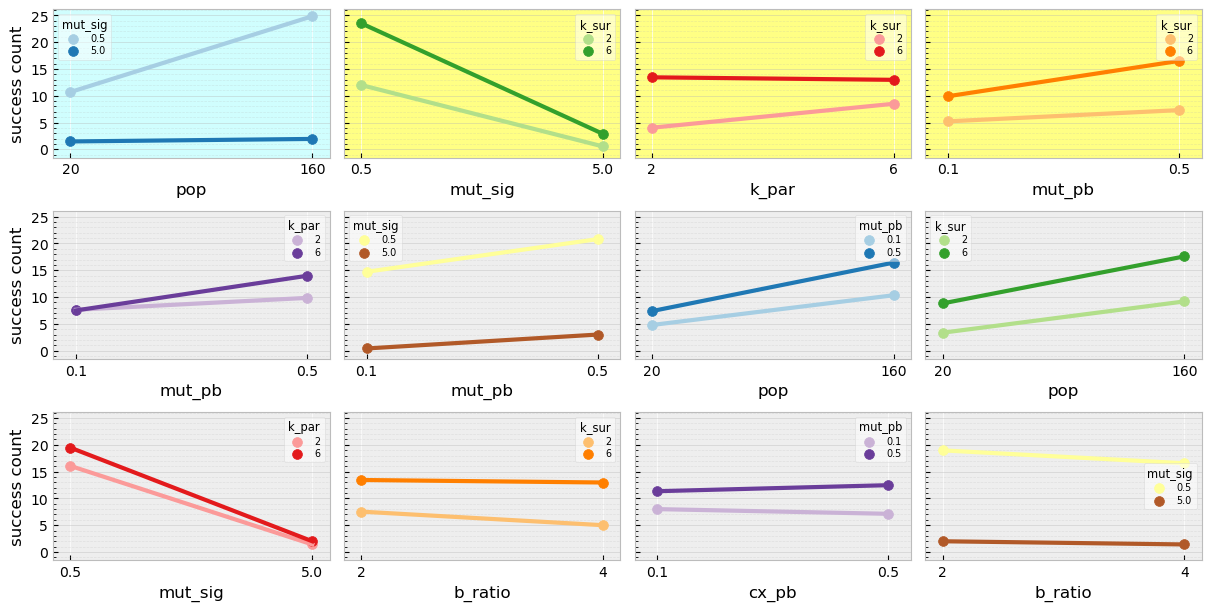

Wall time: 4.61 s


In [40]:
%%time
fig, axs = plt.subplots(
    nrows=3, ncols=4, sharey=True, constrained_layout=True, figsize=(12, 6)
)
# set palette
palette = it.cycle(sns.color_palette("Paired"))

for i, ax in enumerate(axs.flat):
    (a, b) = effect_level_2_ranked[i]
    c = next(palette)
    sns.regplot(
        x=a,
        y="success",
        data=fit_success_doe[fit_success_doe[b] == fit_success_doe[b].min()],
        label=str(fit_success_doe[b].min()),
        x_estimator=np.mean,
        color=c,
        x_ci=None,
        ci=None,
        truncate=True,
        ax=ax,
    )
    c = next(palette)
    sns.regplot(
        x=a,
        y="success",
        data=fit_success_doe[fit_success_doe[b] == fit_success_doe[b].max()],
        label=str(fit_success_doe[b].max()),
        x_estimator=np.mean,
        color=c,
        x_ci=None,
        ci=None,
        truncate=True,
        ax=ax,
    )
    ax.set_ylabel(None)
    ax.set_axisbelow(True)
    x_majors = [fit_success_doe[a].min(), fit_success_doe[a].max()]
    ax.xaxis.set_major_locator(ticker.FixedLocator(x_majors))
    ax.grid(True, axis="x", which="major", alpha=1, color="w", ls="-")
    ax.yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(1))
    ax.grid(True, axis="y", which="major", alpha=0.5, ls="-")
    ax.grid(True, axis="y", which="minor", alpha=0.25, ls="--")
    ax.legend(
        labelspacing=0.25,
        fontsize="x-small",
        title=str(b),
        title_fontsize="small",
        facecolor="white",
        framealpha=0.5,
    )
    if effect_level_2_ranked[i] in effects_top_10:
        ax.set_facecolor("xkcd:pale yellow")
    if effect_level_2_ranked[i] in effects_top_5:
        ax.set_facecolor("xkcd:pale blue")
    if effect_level_2_ranked[i] in effects_top_3:
        ax.set_facecolor("xkcd:pale green")

axs[0, 0].set_ylabel("success count")
axs[1, 0].set_ylabel("success count")
axs[2, 0].set_ylabel("success count")

plt.show()

### ANOVA Analysis

From unreplicated 7-level to 4-replicate 5-level

In [41]:
%%time
factors_5l = ["mut_sig", "pop", "k_sur", "mut_pb", "k_par"]
fit_success_5l = fit_res_df.assign(success=fit_res_df.best.le(1e-6))
fit_success_5l = fit_success_5l.groupby(factors, as_index=False).agg(
    {"success": np.sum}
)
fit_success_5l["success"] = fit_success_5l["success"]/40*100

Wall time: 31.2 ms


In [42]:
for factor in factors_5l:
    fac_min = fit_success_5l[factor].min()
    fac_max = fit_success_5l[factor].max()

    fit_success_5l[factor] = fit_success_5l[factor].map(
        lambda v: -1 if v == fac_min else 1
    )

labels_5l = {}
labels_5l[1] = list(factors_5l)
for i in [2, 3, 4, 5]:
    labels_5l[i] = list(it.combinations(labels_5l[1], i))

obs_list_5l = ["success"]

effects_5l = {}

effects_5l[0] = {"x0": [fit_success_5l[obs_list_5l[0]].mean()]}

effects_5l[1] = {}
for key in labels_5l[1]:
    effects_result = []
    for obs in obs_list_5l:
        effects_df = fit_success_5l.groupby(key)[obs].mean()
        result = sum([zz * effects_df.loc[zz] for zz in effects_df.index])
        effects_result.append(result)
    effects_5l[1][key] = effects_result

for c in range(2, 6):
    effects_5l[c] = {}
    for key in labels_5l[c]:
        effects_result = []
        for obs in obs_list_5l:
            effects_df = fit_success_5l.groupby(key)[obs].mean()
            result = sum(
                [
                    np.prod(zz) * effects_df.loc[zz] / (2 ** (len(zz) - 1))
                    for zz in effects_df.index
                ]
            )
            effects_result.append(result)
        effects_5l[c][key] = effects_result

C:\Anaconda3\envs\ea_thesis\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: Interpreting tuple 'by' as a list of keys, rather than a single key. Use 'by=[...]' instead of 'by=(...)'. In the future, a tuple will always mean a single key.


In [43]:
master_dict_5l = {}
for nvars in effects_5l.keys():
    effect = effects_5l[nvars]
    for k in effect.keys():
        v = effect[k]
        master_dict_5l[k] = nvars, v[0]

In [44]:
master_df_5l = pd.DataFrame(master_dict_5l).T
master_df_5l.columns = ["interaction"] + obs_list_5l
master_df_5l.head(15)

,interaction,success
x0,0.0,24.335938
mut_sig,1.0,-40.156250
pop,1.0,18.281250
k_sur,1.0,17.343750
mut_pb,1.0,10.859375
k_par,1.0,5.000000
"(mut_sig, pop)",2.0,-17.109375
"(mut_sig, k_sur)",2.0,-11.484375
"(mut_sig, mut_pb)",2.0,-4.375000
"(mut_sig, k_par)",2.0,-3.515625


In [45]:
n_doe_5l = 4
k_doe_5l = 5

y1_5l = master_df_5l.copy()
y1_5l = y1_5l.iloc[y1_5l[obs_list_5l[0]].abs().argsort].iloc[::-1]
y1_5l = y1_5l.drop("x0")
y1_5l.columns = ["Int Level", "Effect_Estimate"]
y1_5l.index.names = ["Factors"]
y1_5l["Sum_of_Squares"] = (
    y1_5l["Effect_Estimate"] ** 2 * n_doe_5l * (2 ** (k_doe_5l - 2))
)

SS_tot_5l = (fit_success_5l[obs_list_5l[0]] ** 2).sum() - (
    (fit_success_5l[obs_list_5l[0]].sum() ** 2) / len(fit_success_5l[obs_list_5l[0]])
)
SS_err_5l = SS_tot_5l - (y1_5l["Sum_of_Squares"].sum())
y1_5l["%_Contribution"] = y1_5l["Sum_of_Squares"] / SS_tot * 100
effect_estimate_5l = y1_5l.copy()
effect_estimate_5l.index.names = ["Interaction"]
effect_estimate_5l.drop(["Int Level"], axis=1).head(15)

,Effect_Estimate,Sum_of_Squares,%_Contribution
Interaction,,,
mut_sig,-40.156250,51600.781250,49.762766
pop,18.281250,10694.531250,10.313593
k_sur,17.343750,9625.781250,9.282912
"(mut_sig, pop)",-17.109375,9367.382812,9.033718
"(mut_sig, k_sur)",-11.484375,4220.507812,4.070174
mut_pb,10.859375,3773.632812,3.639216
"(k_sur, k_par)",-6.171875,1218.945312,1.175527
"(mut_sig, k_sur, k_par)",5.625000,1012.500000,0.976435
"(k_sur, mut_pb)",5.625000,1012.500000,0.976435


In [46]:
y1_5l.groupby(["Int Level"]).agg(
    OrderedDict(
        [
            ("Effect_Estimate", "count"),
            ("Sum_of_Squares", "sum"),
            ("%_Contribution", ["sum", "max", "min"]),
        ]
    )
).rename(columns={"Effect_Estimate": "Count", "sum": "total", "count": "total"})

Count Sum_of_Squares %_Contribution                     
          total          total          total        max       min
Int Level                                                         
1.0           5   76494.726562      73.769992  49.762766  0.771504
2.0          10   18830.859375      18.160106   9.033718  0.054435
3.0          10    3170.703125       3.057763   0.976435  0.001695
4.0           5     717.382812       0.691830   0.433971  0.003014
5.0           1       1.757812       0.001695   0.001695  0.001695

ANOVA Analysis with F statistics (significance level 5%)

In [47]:
ANOVA_succ_5l = y1_5l.copy()
ANOVA_succ_5l = ANOVA_succ_5l.drop("Effect_Estimate", axis=1)

In [48]:
ANOVA_succ_5l["Dgrs. Freedom"] = 1
df_tot_5l = n_doe_5l * 2 ** k_doe_5l - 1
df_err_5l = 2 ** k_doe_5l * (n_doe_5l - 1)

In [49]:
ANOVA_succ_5l["Mean Sqrs"] = (
    ANOVA_succ_5l["Sum_of_Squares"] / ANOVA_succ_5l["Dgrs. Freedom"]
)
ms_err_5l = SS_err_5l / df_err_5l

ANOVA_succ_5l["F 0"] = ANOVA_succ_5l["Mean Sqrs"] / ms_err_5l
sig_level = 0.05
ANOVA_succ_5l["P-Value"] = 1 - sstats.f.cdf(ANOVA_succ_5l["F 0"], dfn=1, dfd=df_err_5l)
# ANOVA_succ_5l["F critical"] = stats.f.ppf(q=1 - sig_level, dfn=1, dfd=df_tot)
# ANOVA_succ_5l["Significant"] = ANOVA_succ_5l["F ratio"] > ANOVA_succ_5l["F critical"]

In [50]:
ANOVA_succ_5l.loc["Error"] = [
    "Err",
    SS_err_5l,
    SS_err_5l / SS_tot_5l * 100,
    df_err_5l,
    ms_err_5l,
    "",
    "",
]
ANOVA_succ_5l.loc["Total"] = [
    "Tot",
    SS_tot_5l,
    SS_tot_5l / SS_tot_5l * 100,
    df_tot_5l,
    "",
    "",
    "",
]
ANOVA_succ_5l.loc["Model"] = [
    "Mod",
    SS_tot_5l - SS_err_5l,
    (SS_tot_5l - SS_err_5l) / SS_tot_5l * 100,
    "",
    "",
    "",
    "",
]

In [51]:
ANOVA_succ_5l[['Sum_of_Squares', '%_Contribution', 'Dgrs. Freedom',
       'Mean Sqrs', 'F 0', 'P-Value']]

,Sum_of_Squares,%_Contribution,Dgrs. Freedom,Mean Sqrs,F 0,P-Value
Factors,,,,,,
mut_sig,51600.781250,49.762766,1,51600.8,1106.19,1.11022e-16
pop,10694.531250,10.313593,1,10694.5,229.264,1.11022e-16
k_sur,9625.781250,9.282912,1,9625.78,206.353,1.11022e-16
"(mut_sig, pop)",9367.382812,9.033718,1,9367.38,200.814,1.11022e-16
"(mut_sig, k_sur)",4220.507812,4.070174,1,4220.51,90.4773,1.66533e-15
mut_pb,3773.632812,3.639216,1,3773.63,80.8974,2.15383e-14
"(k_sur, k_par)",1218.945312,1.175527,1,1218.95,26.1312,1.62497e-06
"(mut_sig, k_sur, k_par)",1012.500000,0.976435,1,1012.5,21.7055,1.02273e-05
"(k_sur, mut_pb)",1012.500000,0.976435,1,1012.5,21.7055,1.02273e-05


In [52]:
ANOVA_succ_5l.groupby(["Int Level"]).agg(
    OrderedDict(
        [("Int Level", "count"), ("Sum_of_Squares", "sum"), ("%_Contribution", "sum")]
    )
).rename(columns={"Int Level": "Count", "sum": "total", "count": "total"})

,Count,Sum_of_Squares,%_Contribution
Int Level,,,
1.0,5,76494.726562,73.769992
2.0,10,18830.859375,18.160106
3.0,10,3170.703125,3.057763
4.0,5,717.382812,0.691830
5.0,1,1.757812,0.001695
Err,1,4478.125000,4.318615
Mod,1,99215.429688,95.681385
Tot,1,103693.554688,100.000000


In [53]:
df_show = ANOVA_succ_5l.iloc[np.r_[-1, 0:15, -3, -2]]
print(df_show[['Sum_of_Squares', '%_Contribution', 'Dgrs. Freedom',
       'Mean Sqrs', 'F 0', 'P-Value']].to_latex(float_format=lambda x: '%.1f' % x))

\begin{longtable}{lrrllll}
\toprule
{} &  Sum\_of\_Squares &  \%\_Contribution & Dgrs. Freedom & Mean Sqrs &    F 0 & P-Value \\
Factors                  &                 &                 &               &           &        &         \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Model                    &         99215.4 &            95.7 &               &           &        &         \\
mut\_sig                  &         51600.8 &            49.8 &             1 &   51600.8 & 1106.2 &     0.0 \\
pop                      &         10694.5 &            10.3 &             1 &   10694.5 &  229.3 &     0.0 \\
k\_sur                    &          9625.8 &             9.3 &             1 &    9625.8 &  206.4 &     0.0 \\
(mut\_sig, pop)           &          9367.4 &             9.0 &             1 &    9367.4 &  200.8 &     0.0 \\
(mut\_sig, k\_sur)         &          4220.5 &             4.1 &             1 &   

In [54]:
print(df_show[['Sum_of_Squares', '%_Contribution', 'Dgrs. Freedom',
       'Mean Sqrs', 'F 0', 'P-Value']].to_latex())

\begin{longtable}{lrrllll}
\toprule
{} &  Sum\_of\_Squares &  \%\_Contribution & Dgrs. Freedom & Mean Sqrs &      F 0 &      P-Value \\
Factors                  &                 &                 &               &           &          &              \\
\midrule
\endhead
\midrule
\multicolumn{7}{r}{{Continued on next page}} \\
\midrule
\endfoot

\bottomrule
\endlastfoot
Model                    &    99215.429688 &       95.681385 &               &           &          &              \\
mut\_sig                  &    51600.781250 &       49.762766 &             1 &   51600.8 &  1106.19 &  1.11022e-16 \\
pop                      &    10694.531250 &       10.313593 &             1 &   10694.5 &  229.264 &  1.11022e-16 \\
k\_sur                    &     9625.781250 &        9.282912 &             1 &   9625.78 &  206.353 &  1.11022e-16 \\
(mut\_sig, pop)           &     9367.382812 &        9.033718 &             1 &   9367.38 &  200.814 &  1.11022e-16 \\
(mut\_sig, k\_sur)         &     4

### Normal probability plots of the effects

Quantify which effects are not normally distributed, to assist in identifying important variables.

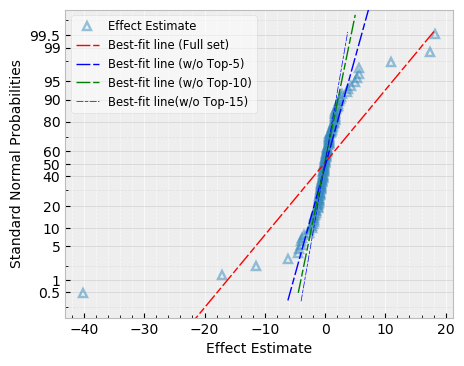

In [58]:
fig, ax = plt.subplots(figsize=(5, 4))
scatter_options_inv = dict(
    marker="^",
    markerfacecolor="none",
    markeredgewidth=1.75,
    linestyle="none",
    alpha=0,
    zorder=5,
)
scatter_options = dict(
    marker="^",
    markerfacecolor="none",
    markeredgewidth=1.75,
    linestyle="none",
    alpha=0.5,
    zorder=5,
    label="Effect Estimate",
)
line_options = dict(
    dashes=(10, 2, 5, 2), color="r", linewidth=1, zorder=10, label="Best-fit line (Full set)"
)
line_options_5 = dict(
    dashes=(10, 2, 5, 2), color="b", linewidth=1, zorder=10, label="Best-fit line (w/o Top-5)"
)
line_options_10 = dict(
    dashes=(10, 2, 5, 2), color="g", linewidth=1, zorder=10, label="Best-fit line (w/o Top-10)"
)
line_options_15 = dict(
    dashes=(10, 2, 5, 2), color="b", linewidth=.5, zorder=10, label="Best-fit line(w/o Top-15)"
)
fig = probscale.probplot(
    effect_estimate["Effect_Estimate"],
    ax=ax,
    plottype="prob",
    probax="y",
    problabel="Standard Normal Probabilities",
    datalabel="Effect Estimate",
    scatter_kws=scatter_options,
)
fig = probscale.probplot(
    effect_estimate["Effect_Estimate"],
    ax=ax,
    plottype="prob",
    bestfit=True,
    probax="y",
    problabel="Standard Normal Probabilities",
    datalabel="Effect Estimate",
    scatter_kws=scatter_options_inv,
    line_kws=line_options,
)
fig = probscale.probplot(
    effect_estimate["Effect_Estimate"].iloc[5:],
    ax=ax,
    plottype="prob",
    bestfit=True,
    probax="y",
    problabel="Standard Normal Probabilities",
    datalabel="Effect Estimate",
    scatter_kws=scatter_options_inv,
    line_kws=line_options_5,
)
fig = probscale.probplot(
    effect_estimate["Effect_Estimate"].iloc[10:],
    ax=ax,
    plottype="prob",
    bestfit=True,
    probax="y",
    problabel="Standard Normal Probabilities",
    datalabel="Effect Estimate",
    scatter_kws=scatter_options_inv,
    line_kws=line_options_10,
)
fig = probscale.probplot(
    effect_estimate["Effect_Estimate"].iloc[15:],
    ax=ax,
    plottype="prob",
    bestfit=True,
    probax="y",
    problabel="Standard Normal Probabilities",
    datalabel="Effect Estimate",
    scatter_kws=scatter_options_inv,
    line_kws=line_options_15,
)
y_majors = [0.5, 1, 5, 10, 20, 40, 50, 60, 80, 90, 95, 99, 99.5]
y_minors = [0.1, 0.2, 2, 30, 70, 98, 99.8, 99.9]
ax.legend(facecolor="white", fontsize="small", framealpha=0.5)
ax.yaxis.set_major_locator(ticker.FixedLocator(y_majors))
ax.grid(True, axis="y", which="major", alpha=0.5, ls="-")
ax.yaxis.set_minor_locator(ticker.FixedLocator(y_minors))
ax.grid(True, axis="y", which="minor", alpha=0.25, ls="--")
ax.set_ylabel("Standard Normal Probabilities", fontsize="medium")
ax.grid(True, axis="x", which="major", alpha=1, color="w", ls="-")
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
ax.grid(True, axis="x", which="minor", alpha=0.75, color="w", ls="--")
ax.set_xlabel("Effect Estimate", fontsize="medium")
ax.set_axisbelow(True)
plt.show()

### Normal probability plot of residuals

In [59]:
fit_success.head()

,pop,b_ratio,cx_pb,mut_pb,mut_sig,k_par,k_sur,success
0,-1,-1,-1,-1,-1,-1,-1,22.5
1,-1,-1,-1,-1,-1,-1,1,37.5
2,-1,-1,-1,-1,-1,1,-1,12.5
3,-1,-1,-1,-1,-1,1,1,35.0
4,-1,-1,-1,-1,1,-1,-1,0.0


In [60]:
pred_c_0 = effects[0]["x0"][0]

pred_c_mut_sig = effects[1]["mut_sig"][0] / 2
pred_c_pop = effects[1]["pop"][0] / 2
pred_c_k_sur = effects[1]["k_sur"][0] / 2
pred_c_mut_pb = effects[1]["mut_pb"][0] / 2
pred_c_b_ratio = effects[1]["b_ratio"][0] / 2

pred_c_pop_mut_sig = effects[2][("pop", "mut_sig")][0] / 2
pred_c_mut_sig_k_sur = effects[2][("mut_sig", "k_sur")][0] / 2
pred_c_mut_pb_k_sur = effects[2][("mut_pb", "k_sur")][0] / 2

print(pred_c_0)
print(pred_c_mut_sig, pred_c_pop, pred_c_k_sur, pred_c_mut_pb, pred_c_b_ratio)
print(pred_c_pop_mut_sig, pred_c_mut_sig_k_sur,pred_c_mut_pb_k_sur)

24.3359375
-20.078125 9.140625 8.671875 5.4296875 -1.875
-8.5546875 -5.7421875 2.8125


In [61]:
def pred_1(b_ratio, cx_pb, mut_pb, mut_sig, k_par, k_sur):
    pred_1 = (
        pred_c_0
        + pred_c_mut_sig * mut_sig
        + pred_c_k_sur * k_sur
        + pred_c_mut_pb * mut_pb
        + pred_c_b_ratio * b_ratio
    )
    # Error con pop
    return pred_1


def pred_2(b_ratio, cx_pb, mut_pb, mut_sig, k_par, k_sur):
    pred_2 = (
        pred_c_mut_sig_k_sur * mut_sig * k_sur
        + pred_c_mut_pb_k_sur * mut_pb * k_sur
    )
    # Error con pop
    return pred_2


fit_prediction = fit_success.copy().infer_objects()
fit_prediction["pred_1"] = fit_success.apply(
    lambda x: pred_1(x.b_ratio, x.cx_pb, x.mut_pb, x.mut_sig, x.k_par, x.k_sur), axis=1
)
fit_prediction["pred_1"] = fit_prediction["pred_1"] + fit_prediction["pop"] * pred_c_pop
fit_prediction = fit_prediction.assign(res_1=lambda x: x.success - x.pred_1)
fit_prediction["pred_2"] = fit_success.apply(
    lambda x: pred_2(x.b_ratio, x.cx_pb, x.mut_pb, x.mut_sig, x.k_par, x.k_sur), axis=1
)
fit_prediction["pred_2"] = fit_prediction["pred_2"] + fit_prediction["pred_1"]
fit_prediction["pred_2"] = (
    fit_prediction["pred_2"]
    + fit_prediction["pop"] * fit_prediction["mut_sig"] * pred_c_pop_mut_sig
)
fit_prediction = fit_prediction.assign(res_2=lambda x: x.success - x.pred_2)

fit_prediction.head()

,pop,b_ratio,cx_pb,mut_pb,mut_sig,k_par,k_sur,success,pred_1,res_1,pred_2,res_2
0,-1,-1,-1,-1,-1,-1,-1,22.5,23.046875,-0.546875,11.562500,10.937500
1,-1,-1,-1,-1,-1,-1,1,37.5,40.390625,-2.890625,34.765625,2.734375
2,-1,-1,-1,-1,-1,1,-1,12.5,23.046875,-10.546875,11.562500,0.937500
3,-1,-1,-1,-1,-1,1,1,35.0,40.390625,-5.390625,34.765625,0.234375
4,-1,-1,-1,-1,1,-1,-1,0.0,-17.109375,17.109375,0.000000,0.000000


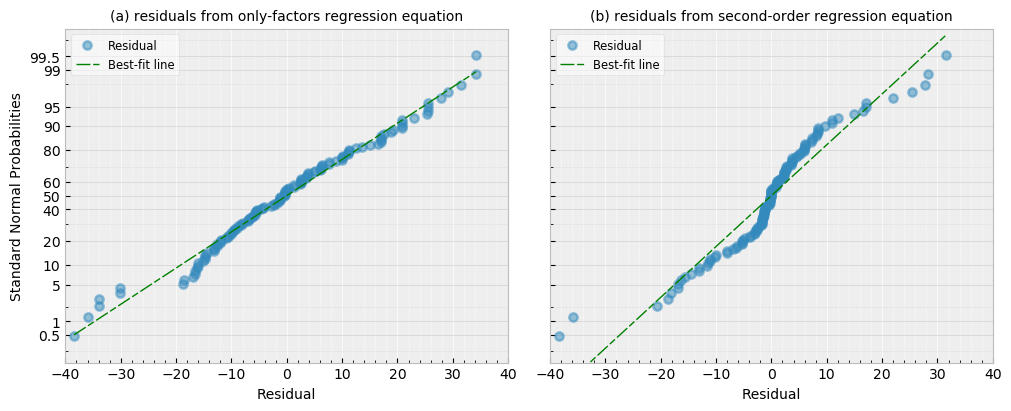

In [65]:
fig, axs = plt.subplots(figsize=(10, 4), ncols=2, sharex=True, constrained_layout=True)
# fig, ax = plt.subplots(figsize=(6,4.5))

scatter_options = dict(
    marker="o",
    markeredgewidth=1.75,
    linestyle="none",
    alpha=0.5,
    zorder=5,
    label="Residual",
)
line_options = dict(
    dashes=(10, 2, 5, 2), color="g", linewidth=1, zorder=10, label="Best-fit line"
)

fig = probscale.probplot(
    fit_prediction["res_1"],
    ax=axs[0],
    plottype="prob",
    probax="y",
    datalabel="Residual",
    bestfit=True,
    scatter_kws=scatter_options,
    line_kws=line_options,
)
fig = probscale.probplot(
    fit_prediction["res_2"],
    ax=axs[1],
    plottype="prob",
    probax="y",
    datalabel="Residual",
    bestfit=True,
    scatter_kws=scatter_options,
    line_kws=line_options,
)

y_majors = [0.5, 1, 5, 10, 20, 40, 50, 60, 80, 90, 95, 99, 99.5]
y_minors = [0.1, 0.2, 2, 30, 70, 98, 99.8, 99.9]

axs[0].set_title("(a) residuals from only-factors regression equation", fontsize="medium")
axs[1].set_title("(b) residuals from second-order regression equation", fontsize="medium")
axs[0].set_ylabel("Standard Normal Probabilities", fontsize="medium")
axs[1].yaxis.set_ticklabels([])

for ax in axs.flat:
    ax.legend(facecolor="white", fontsize="small", framealpha=0.5)
    ax.yaxis.set_major_locator(ticker.FixedLocator(y_majors))
    ax.yaxis.set_minor_locator(ticker.FixedLocator(y_minors))
    ax.grid(True, axis="y", which="major", alpha=0.5, ls="-")
    ax.grid(True, axis="y", which="minor", alpha=0.25, ls="--")
    ax.xaxis.set_minor_locator(ticker.AutoMinorLocator())
    ax.grid(True, axis="x", which="major", alpha=1, color="w", ls="-")
    ax.grid(True, axis="x", which="minor", alpha=0.75, color="w", ls="--")
    ax.set_xlabel("Residual", fontsize="medium")
    ax.set_xlim((-40, 40))
plt.show()

### Contour plots of predicted values

In [66]:
pred_c_0 = effects[0]["x0"][0]

pred_c_mut_sig = effects[1]["mut_sig"][0] / 2
pred_c_pop = effects[1]["pop"][0] / 2
pred_c_k_sur = effects[1]["k_sur"][0] / 2
pred_c_mut_pb = effects[1]["mut_pb"][0] / 2
pred_c_b_ratio = effects[1]["b_ratio"][0] / 2


pred_c_pop_mut_sig = effects[2][("pop", "mut_sig")][0] / 2
pred_c_mut_sig_k_sur = effects[2][("mut_sig", "k_sur")][0] / 2
pred_c_mut_pb_k_sur = effects[2][("mut_pb", "k_sur")][0] / 2

def pred_1_2(pop, b_ratio, cx_pb, mut_pb, mut_sig, k_par, k_sur):
    pred_1_2 = (
        pred_c_0
        
        + pred_c_mut_sig * mut_sig
        + pred_c_pop * pop
        + pred_c_k_sur * k_sur
        + pred_c_mut_pb * mut_pb
        + pred_c_b_ratio * b_ratio
        
        + pred_c_pop_mut_sig * pop * mut_sig
        + pred_c_mut_sig_k_sur * mut_sig * k_sur
        + pred_c_mut_pb_k_sur * mut_pb * k_sur
    )
    return pred_1_2

Wall time: 501 ms


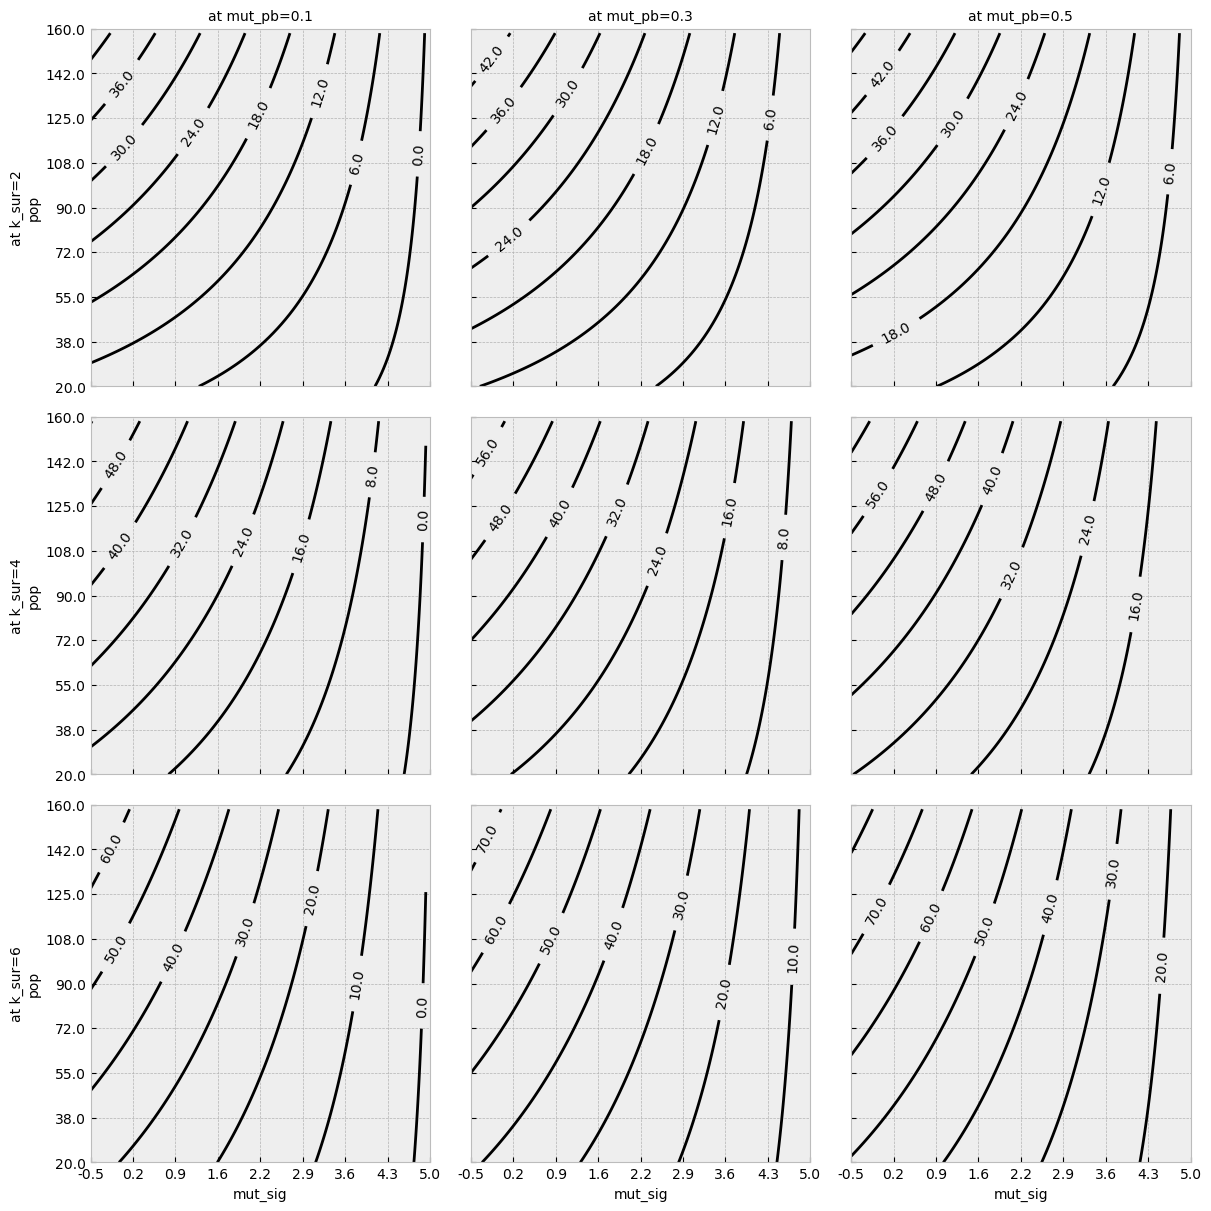

In [69]:
%%time
fig, axs = plt.subplots(
    figsize=(12, 12),
    nrows=3,
    ncols=3,
    sharex=True,
    sharey=True,
    constrained_layout=True,
)

#Variable values
delta = 0.025
mut_sig_x = np.arange(-1.0, 1.0, delta)
pop_y = np.arange(-1.0, 1.0, delta)

k_sur_plot_list = [-1, 0, 1]
mut_pb_plot_list = [-1, 0, 1]

b_ratio_plot = 0
k_par_plot = 0
cx_pb_plot = 0

X, Y = np.meshgrid(mut_sig_x, pop_y)

k_sur_title = [2, 4, 6]
mut_pb_title = [.1, .3, .5]

for i, row in enumerate(axs):
    for j, cell in enumerate(row):
        Z = pred_1_2(
            Y, #pop_plot_list[j],
            b_ratio_plot, #Y,
            cx_pb_plot,
            mut_pb_plot_list[j],
            X,
            k_par_plot,
            k_sur_plot_list[i],
        )
        ax = axs[i, j]
        CS = ax.contour(X, Y, Z, colors="black")
        ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
        if i == 0:
            cell.set_title("at mut_pb=" + str(mut_pb_title[j]), fontsize="medium")
        if i == len(axs) - 1:
            cell.set_xlabel("mut_sig", fontsize="medium")
            mut_sig_map = np.linspace(-0.5, 5, 9)
            mut_sig_map = [round(elem, 1) for elem in mut_sig_map]
            ax.set_xticklabels(mut_sig_map)
        if j == 0:
            cell.set_ylabel(
                "at k_sur=" + str(k_sur_title[i]) + "\n" + "pop", fontsize="medium"
            )
            pop_map = np.linspace(20, 160, 9)
            pop_map = [round(elem, 0) for elem in pop_map]
            ax.set_yticklabels(pop_map)

axs[0, 0].set_ylim((-1, 1))
axs[0, 0].set_xlim((-1, 1))

Wall time: 609 ms


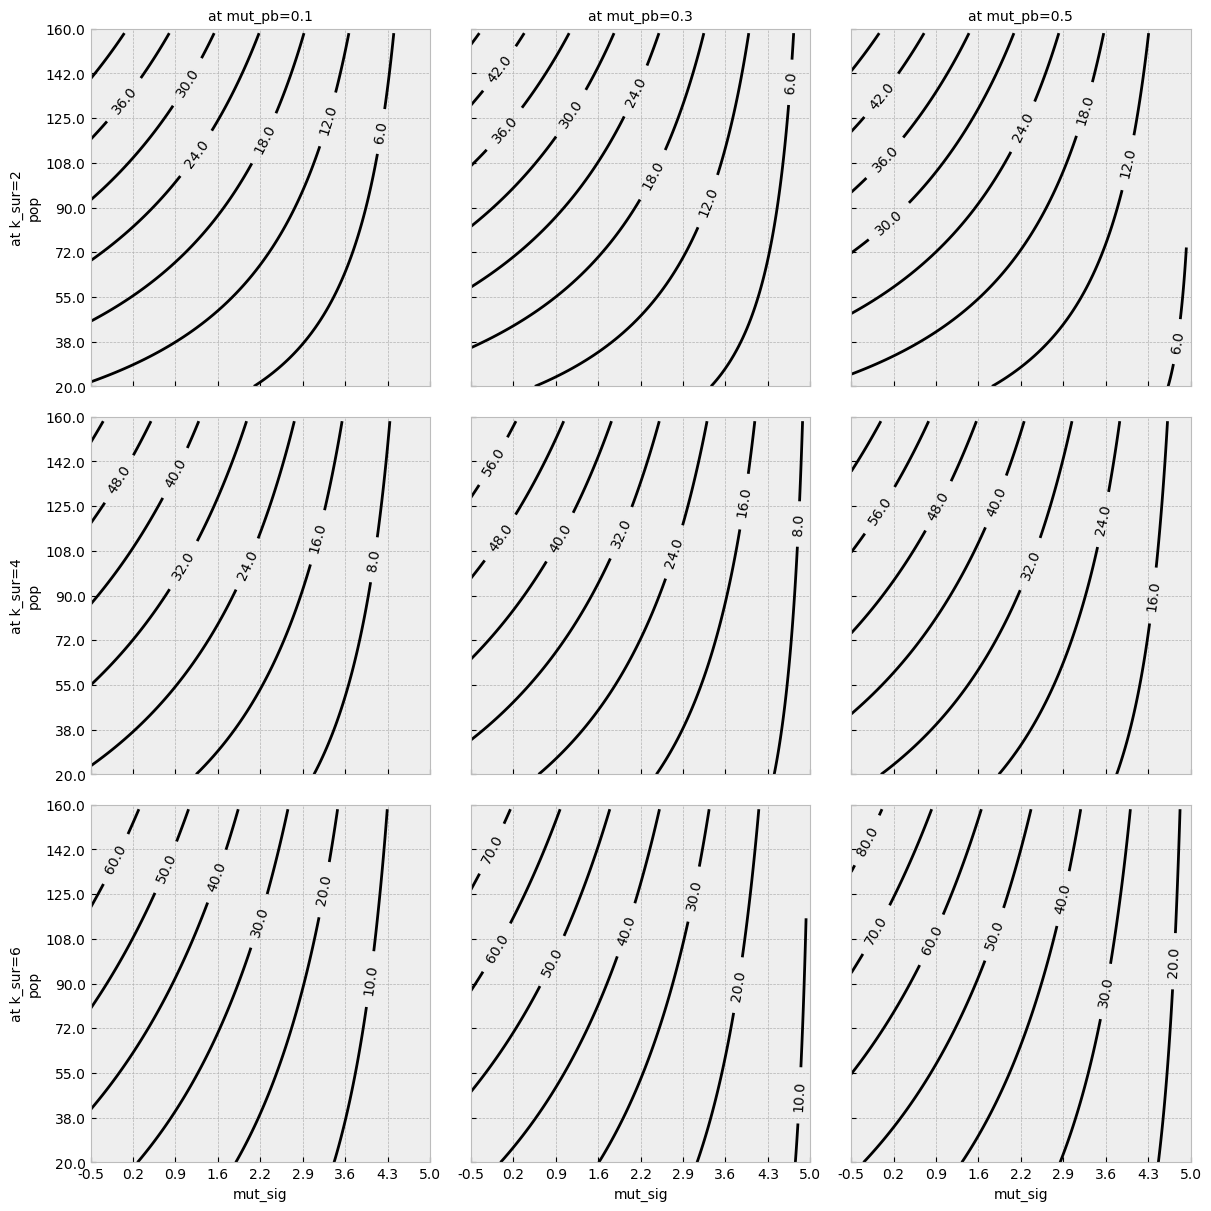

In [72]:
%%time
fig, axs = plt.subplots(
    figsize=(12, 12),
    nrows=3,
    ncols=3,
    sharex=True,
    sharey=True,
    constrained_layout=True,
)

#Variable values
delta = 0.025
mut_sig_x = np.arange(-1.0, 1.0, delta)
pop_y = np.arange(-1.0, 1.0, delta)

k_sur_plot_list = [-1, 0, 1]
mut_pb_plot_list = [-1, 0, 1]

b_ratio_plot = -1
k_par_plot = 0
cx_pb_plot = 0

X, Y = np.meshgrid(mut_sig_x, pop_y)

k_sur_title = [2, 4, 6]
mut_pb_title = [.1, .3, .5]

for i, row in enumerate(axs):
    for j, cell in enumerate(row):
        Z = pred_1_2(
            Y, #pop_plot_list[j],
            b_ratio_plot, #Y,
            cx_pb_plot,
            mut_pb_plot_list[j],
            X,
            k_par_plot,
            k_sur_plot_list[i],
        )
        ax = axs[i, j]
        CS = ax.contour(X, Y, Z, colors="black")
        ax.clabel(CS, inline=1, fontsize=10, fmt='%1.1f')
        if i == 0:
            cell.set_title("at mut_pb=" + str(mut_pb_title[j]), fontsize="medium")
        if i == len(axs) - 1:
            cell.set_xlabel("mut_sig", fontsize="medium")
            mut_sig_map = np.linspace(-0.5, 5, 9)
            mut_sig_map = [round(elem, 1) for elem in mut_sig_map]
            ax.set_xticklabels(mut_sig_map)
        if j == 0:
            cell.set_ylabel(
                "at k_sur=" + str(k_sur_title[i]) + "\n" + "pop", fontsize="medium"
            )
            pop_map = np.linspace(20, 160, 9)
            pop_map = [round(elem, 0) for elem in pop_map]
            ax.set_yticklabels(pop_map)

axs[0, 0].set_ylim((-1, 1))
axs[0, 0].set_xlim((-1, 1))

# Visualization of data

Average value of minimum fitness for each generation

In [ ]:
fit_log_file = pickle_dir + file_sufix + "_fit_log_df_80k.xz"
fit_log_df = pd.read_pickle(fit_log_file)

In [ ]:
fit_log_df.head()

In [ ]:
%%time
g = sns.relplot(
    x="births",
    y="best",
    col="pop",
    row="k_sur",
    hue="b_ratio",
    kind="line",
    data=fit_log_df[fit_log_df["mut_sig"] == 0.5],
)

leg = g._legend
leg.set_bbox_to_anchor([0.65, 0.95])
leg._loc = 1